## Multi-layer Perceptron Implementation
---------------------------------------
A [multi-layer perceptron](https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning) is a type of [feedforward neural network (FNN)](https://deepai.org/machine-learning-glossary-and-terms/feed-forward-neural-network). It is composed of fully connected layers and non-linear activation functions, and is commonly used for classifying data that cannot be separated by a straight line.

![MLP](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

### Input layer:
Each neuron represents a feature (e.g. petal length). This layer passes data forward without performing computation.

### Hidden layer:
Hidden layers form the core of the neural network. Neurons:

- Receive inputs from all previous-layer neurons (fully connected)
- Apply a weighted sum and a non-linear activation function (like ReLU)
- Learn by updating weights during training

### Output layer:
Generates the prediction. For classification tasks like the Iris dataset, each neuron can represent a class (e.g. setosa, versicolor, virginica).


Check out [Neural Network Playground](https://playground.tensorflow.org/) to experiment with layers, activations, and more.

## Step 1: Define the MLP model

In [1]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        """
        Initialise a simple feedforward MLP architecture.
        
        Parameters:
         input_size: Number of input features (e.g., 4 for Iris dataset)
         hidden_size: Number of neurons in the hidden layer
         num_classes: Number of output classes (e.g., 3 for Iris species)
        """
        super(MLP, self).__init__()
        
        # First layer (input to hidden)
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        # Second layer (hidden to hidden)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        
        # Output layer (hidden to output)
        self.output = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)  # Softmax for multi-class classification

        """
        Softmax is applied to the output layer to convert raw scores (logits) into probabilities.
        The dim=1 argument specifies that the softmax should be applied across the classes (columns) for each sample (row).
        E.g. softmax([a, b, c]) = [exp(a)/(exp(a)+exp(b)+exp(c)), exp(b)/(exp(a)+exp(b)+exp(c)), exp(c)/(exp(a)+exp(b)+exp(c))]
        This ensures that the output probabilities are between 0 and 1 and sum to 1 for each sample.
        It's like sigmoid but for multi-class classification.
        """
        
    def forward(self, x):
        """
        Define the forward pass through the network for a single input.
        
        Parameter:
         x: Input tensor of shape [input_size] representing a single sample
        
        Returns:
         Output tensor of shape [num_classes] for a single prediction
        """

        # Forward pass through the network
        # Each step applies a linear transformation followed by a non-linear activation
        
        x = self.layer1(x)
        x = self.relu(x)
            
        x = self.layer2(x)
        x = self.relu(x)
            
        x = self.output(x)
        x = self.softmax(x)  # Apply softmax to get probabilities
        
        return x

## Step 2: Set model parameters and initialise model

In [3]:
input_size = 4    # Assuming 4 features (like Iris dataset)
hidden_size = 16  # Neurons in hidden layer
num_classes = 3   # Output classes 
model = MLP(input_size, hidden_size, num_classes)
model

MLP(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

## Step 3: Loss function

In [4]:
def calculate_loss(model, X, y_true):
    """
    Calculate loss for the model without training.
    
    Parameters:
     model: The MLP model
     X: Input features (torch tensor) - single sample, not batched
     y_true: True label (torch tensor) - single label, not batched
    
    Returns:
     loss: Sum of squared errors loss value
    """
    
    # Add batch dimension of 1 for model compatibility
    X_input = X.unsqueeze(0)  # Adds batch dimension [1, input_features]
    y_pred = model(X_input)   # y_pred shape: [1, num_classes]

    # Get number of classes from model's output layer
    num_classes = model.output.out_features
    
    # Create one-hot encoded label for a single sample
    """
    as we are working with a classification problem that has 3 possible classes (0, 1, and 2). 
    Using one-hot encoding gives us:

    Class 0 becomes: [1, 0, 0]
    Class 1 becomes: [0, 1, 0]
    Class 2 becomes: [0, 0, 1]

    """
    y_true_one_hot = torch.zeros(1, num_classes)
    
    # Convert label tensor to integer and set the appropriate position to 1
    label_idx = y_true.item()
    y_true_one_hot[0, label_idx] = 1
    
    # Calculate sum of squared errors between prediction and one-hot label
    squared_errors = (y_pred - y_true_one_hot) ** 2
    loss = torch.sum(squared_errors)
    
    # Calculate and print the loss value
    loss_value = loss.item()
    
    # Return the loss as a Python float
    return loss_value

## Step 4: Prepare Iris Test Dataset

In [ ]:
# In this step, the process is identical to the data handling steps in "DataPipeline" notebook.
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

# load the dataset
iris = load_iris()
# extract features and target classes
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardise the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

batch_size = 30
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [12]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## Step 5: Evaluate Test Loss and Accuracy



Average SSE loss on test set (30 samples): 0.6694


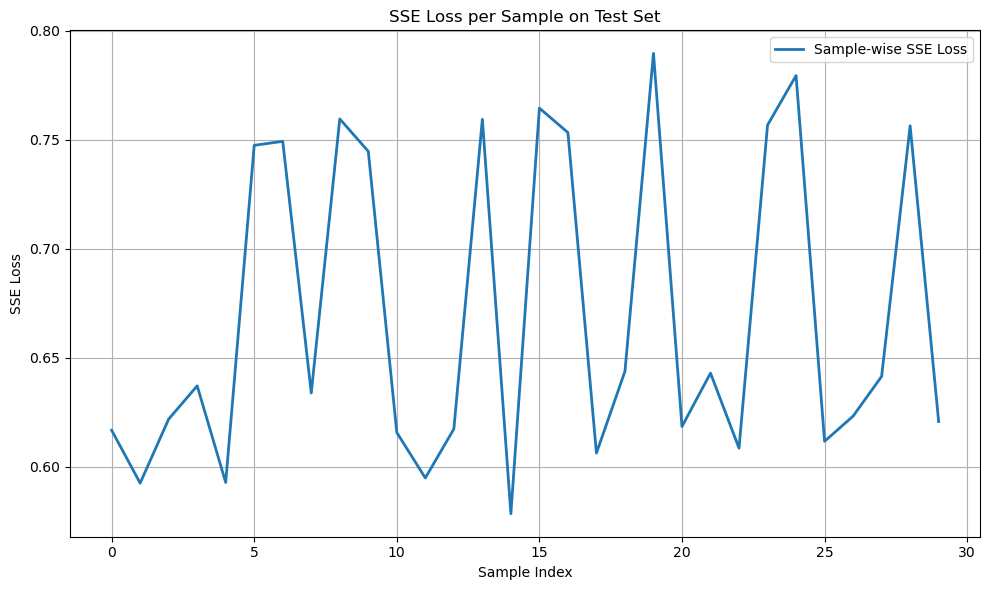

In [6]:
import matplotlib.pyplot as plt
# Initialize a list to store the individual losses
losses = []
# Evaluate the average SSE loss of the model on the test_dataset
model.eval()
total_test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for features, labels in test_loader:
        for i in range(features.size(0)):
            # Extract individual feature and label
            single_feature = features[i]
            single_label = labels[i]

            # Calculate loss for individual sample
            loss = calculate_loss(model, single_feature, single_label)
            losses.append(loss)
            total_test_loss += loss
            num_test_samples += 1

# Calculate average loss across all processed samples
if num_test_samples > 0:
    avg_test_loss = total_test_loss / num_test_samples
    print(f"\nAverage SSE loss on test set ({num_test_samples} samples): {avg_test_loss:.4f}")
    
    # Plot the losses as a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_test_samples), losses, label='Sample-wise SSE Loss', color='tab:blue', linewidth=2)
    plt.xlabel("Sample Index")
    plt.ylabel("SSE Loss")
    plt.title("SSE Loss per Sample on Test Set")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()